In [39]:
import pandas as pd
from __future__ import division
import numpy as np
import pandas as pd
from scipy import stats, integrate
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style="whitegrid", color_codes=True)
from sklearn.preprocessing import label_binarize
from sklearn.dummy import DummyClassifier
from sklearn.metrics import roc_curve, auc, f1_score, accuracy_score, confusion_matrix,precision_recall_curve
from sklearn.cross_validation import KFold, StratifiedKFold, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import (metrics, cross_validation, linear_model, preprocessing)

from scipy import interp

In [40]:
train = pd.read_csv('train.csv')


In [41]:
train.columns = train.columns.map(lambda x : str.lower(x))


In [45]:
train.columns

Index(['action', 'resource', 'mgr_id', 'role_rollup_1', 'role_rollup_2',
       'role_deptname', 'role_title', 'role_family_desc', 'role_family',
       'role_code'],
      dtype='object')

In [43]:
for col in train.columns:
    print str(col) + " -> " + str(len(train[col].unique()))

SyntaxError: invalid syntax (<ipython-input-43-360d6b776eaa>, line 2)

In [46]:
for col in train.columns:
    print (str(col) + " -> " + str(len(train[col].unique())))

action -> 2
resource -> 7518
mgr_id -> 4243
role_rollup_1 -> 128
role_rollup_2 -> 177
role_deptname -> 449
role_title -> 343
role_family_desc -> 2358
role_family -> 67
role_code -> 343


In [47]:
len(train[train['action']==1])/len(train)

0.9421099209618847

In [48]:
train.groupby('action').mean()

,resource,mgr_id,role_rollup_1,role_rollup_2,role_deptname,role_title,role_family_desc,role_family,role_code
action,,,,,,,,,
0,42898.348972,26737.799157,117553.749605,118206.734844,118834.391144,127189.345809,169178.854507,183499.856089,119389.313126
1,42925.487205,25942.943735,116915.690496,118307.666073,118917.596690,125837.918405,170239.787121,183715.916656,119814.016228


In [49]:
train.groupby('action').count()

,resource,mgr_id,role_rollup_1,role_rollup_2,role_deptname,role_title,role_family_desc,role_family,role_code
action,,,,,,,,,
0,1897,1897,1897,1897,1897,1897,1897,1897,1897
1,30872,30872,30872,30872,30872,30872,30872,30872,30872


In [50]:
y_train = train['action']
x_train = train[train.columns.difference(['action'])]

In [12]:
clf = DummyClassifier(strategy='most_frequent',random_state=0)
clf.fit(x_train, y_train)
predictions = clf.predict(x_train)
accuracy_score(y_train,predictions)

0.94210992096188473

In [51]:
accuracy_score(y_train, predictions)

0.94210992096188473

In [52]:
def plot_ROC_curve(classifier, X, y, pos_label=1, n_folds=5):
    mean_tpr = 0.0
    mean_fpr = np.linspace(0, 1, 100)
    all_tpr = []
    for i, (train, test) in enumerate(StratifiedKFold(y, n_folds=n_folds)):
        probas_ = classifier.fit(X[train], y[train]).predict_proba(X[test])
        # Compute ROC curve and area under the curve
        fpr, tpr, thresholds = roc_curve(y[test], probas_[:, 1], pos_label=1)
        mean_tpr += interp(mean_fpr, fpr, tpr)
        mean_tpr[0] = 0.0
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, lw=1, label='ROC fold %d (area = %0.2f)' % (i, roc_auc))
    plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='Random')
    mean_tpr /= n_folds
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    plt.plot(mean_fpr, mean_tpr, 'k--',
         label='Mean ROC (area = %0.2f)' % mean_auc, lw=2)
    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.rcParams["figure.figsize"] = (20,2)
    plt.show()


In [53]:
def plot_PR_curve(classifier, X, y, n_folds=5):
    """
    Plot a basic precision/recall curve.
    """
    for i, (train, test) in enumerate(StratifiedKFold(y, n_folds=n_folds)):
        probas_ = classifier.fit(X[train], y[train]).predict_proba(X[test])
        # Compute ROC curve and area the curve
        precision, recall, thresholds = precision_recall_curve(y[test], probas_[:, 1],
                                                               pos_label=1)
        plt.plot(recall, precision, lw=1, label='PR fold %d' % (i,))
   #  clf_name = str(type(classifier))
   # clf_name = clf_name[clf_name.rindex('.')+1:]
    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-recall curve')
    plt.legend(loc="lower right")
    plt.rcParams["figure.figsize"] = (20,3)
    plt.show()

In [54]:
plot_ROC_curve(wclf, x_train.as_matrix(), y_train)
plot_PR_curve(RandomForestClassifier(), x_train.as_matrix(), y_train, n_folds=5)

NameError: name 'wclf' is not defined

In [17]:
clf = DummyClassifier(strategy='uniform',random_state=0)
clf.fit(x_train, y_train)
clf.score(x_train,y_train)

0.49903872562482832

In [18]:
clf = DummyClassifier(strategy='stratified',random_state=0)
clf.fit(x_train, y_train)
clf.score(x_train,y_train)

0.89059782111141628

In [19]:
f1_score(y_train,predictions)


0.97019217171320371

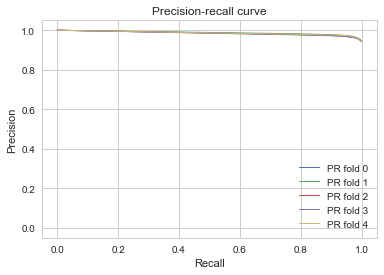

In [21]:
plot_PR_curve(RandomForestClassifier(), x_train.as_matrix(), y_train, n_folds=5)

In [24]:
from imblearn.over_sampling import RandomOverSampler
# Generate the dataset
X = x_train.as_matrix()
y = y_train
# Apply the random over-sampling
ros = RandomOverSampler()
X_oversampled, y_oversampled = ros.fit_sample(X, y)

In [25]:
sum(y_resampled)/len(y_resampled)


NameError: name 'y_resampled' is not defined

In [26]:
def load_data(filename, use_labels=True):
    """
    Load data from CSV files and return them as numpy arrays
    The use_labels parameter indicates whether one should
    read the first column (containing class labels). If false,
    return all 0s. 
    """

    # load column 1 to 8 (ignore last one)
    data = np.loadtxt(open(filename), delimiter=',',
                      usecols=range(1, 9), skiprows=1)
    if use_labels:
        labels = np.loadtxt(open(filename), delimiter=',',
                            usecols=[0], skiprows=1)
    else:
        labels = np.zeros(data.shape[0])
    return labels, data


def save_results(predictions, filename):
    """Given a vector of predictions, save results in CSV format."""
    with open(filename, 'w') as f:
        f.write("id,ACTION\n")
        for i, pred in enumerate(predictions):
            f.write("%d,%f\n" % (i + 1, pred))

In [31]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
model = AdaBoostClassifier(RandomForestClassifier(n_estimators=1000, bootstrap=True, oob_score=True, n_jobs=-1, class_weight='balanced_subsample',max_depth=10),
                         algorithm="SAMME",
                         n_estimators=10)

#model = svm.SVC(kernel='linear', class_weight={0: 10}, probability=True)
y, X = load_data('train.csv')
y_test, X_test = load_data('test.csv', use_labels=False)
SEED = 42  # always use a seed for randomized procedures
# === one-hot encoding === #
# we want to encode the category IDs encountered both in
# the training and the test set, so we fit the encoder on both
encoder = preprocessing.OneHotEncoder()
encoder.fit(np.vstack((X, X_test)))
X = encoder.transform(X)  # Returns a sparse matrix (see numpy.sparse)
X_test = encoder.transform(X_test)

# if you want to create new features, you'll need to compute them
# before the encoding, and append them to your dataset after
####
# === training & metrics === #
mean_auc = 0.0
n = 5  # repeat the CV procedure 10 times to get more precise results
for i in range(n):
    # for each iteration, randomly hold out 20% of the data as CV set
    X_train, X_cv, y_train, y_cv = cross_validation.train_test_split(X, y, test_size=.20, random_state=i*SEED)

    # if you want to perform feature selection / hyperparameter
    # optimization, this is where you want to do it
    
    # train model and make predictions
    model.fit(X_train, y_train) 
    preds = model.predict_proba(X_cv)[:, 1]

    # compute AUC metric for this CV fold
    fpr, tpr, thresholds = metrics.roc_curve(y_cv, preds)
    roc_auc = metrics.auc(fpr, tpr)
    print ("AUC (fold %d/%d): %f" % (i + 1, n, roc_auc))
    mean_auc += roc_auc

print ("Mean AUC: %f" % (mean_auc/n))

# === Predictions === #
# When making predictions, retrain the model on the whole training set
model.fit(X, y)
preds = model.predict_proba(X_test)[:, 1]
save_results(preds, "output.csv")

AUC (fold 1/5): 0.766338
AUC (fold 2/5): 0.782376
AUC (fold 3/5): 0.783004
AUC (fold 4/5): 0.783920
AUC (fold 5/5): 0.761249
Mean AUC: 0.775377


In [62]:
print (random_forest_classifier.feature_importances_)
print (train.columns)

[ 0.26356268  0.08250416  0.16889373  0.05906269  0.13370498  0.07959345
  0.13183175  0.08084656]
Index(['action', 'resource', 'mgr_id', 'role_rollup_1', 'role_rollup_2',
       'role_deptname', 'role_title', 'role_family_desc', 'role_family',
       'role_code'],
      dtype='object')


In [33]:
test = pd.read_csv('test.csv')


In [ ]:
test = pd.read_csv('test.csv')
def split_target_value(dataframe, column):
    target_value = dataframe[column].copy()
    dataframe    = dataframe.drop([column],axis=1)
    return dataframe, target_value

test_dataframe, id_column = split_target_value(test, 'id')
output = random_forest_classifier.predict(test_dataframe)

In [61]:
from sklearn.ensemble import RandomForestClassifier
random_forest_classifier = RandomForestClassifier(n_estimators=1000, bootstrap=True, oob_score=True, n_jobs=-1, class_weight='balanced_subsample')
random_forest_classifier.fit(X_clean, y_clean)

RandomForestClassifier(bootstrap=True, class_weight='balanced_subsample',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=1000, n_jobs=-1, oob_score=True,
            random_state=None, verbose=0, warm_start=False)

In [55]:
from imblearn.over_sampling import RandomOverSampler
# Generate the dataset
X = x_train.as_matrix()
y = y_train
# Apply the random over-sampling
ros = RandomOverSampler()
X_oversampled, y_oversampled = ros.fit_sample(X, y)

In [56]:
from imblearn.under_sampling import RandomUnderSampler 
# Generate the dataset
X = x_train.as_matrix()
y = y_train
# Apply the random over-sampling
ros = RandomUnderSampler()
X_undersampled, y_undersampled = ros.fit_sample(X, y)

In [57]:
from imblearn.over_sampling import   SMOTE 
# Generate the dataset
X = x_train.as_matrix()
y = y_train
# Apply the  smote-sampling
sm = SMOTE(random_state=42)
X_smote, y_smote = sm.fit_sample(X, y)

In [60]:
import numpy as np
from sklearn.neighbors import NearestNeighbors

# Function that creates 2 clusters that partially overlap
# @return: X The datapoints e.g.: [f1, f2, ... ,fn]
# @return: y the classlabels e.g: [0,1,1,1,0,...,Cn]
# @Note : X and y are arrays
def createCluster():
    X, y = make_blobs(n_samples=500, centers=2, n_features=2,random_state=0,center_box = (-5.0,5.0))
    return X,y

# Function which detects the Tomeklinks
# @param: X The datapoints e.g.: [f1, f2, ... ,fn]
# @param: y the classlabels e.g: [0,1,1,1,0,...,Cn]
# @return: 1-D arrays with the indices of the TomekLinks and others

def detectTomekLinks(X,y):
    nonlinks = []
    neigh = NearestNeighbors(n_neighbors=2,algorithm = 'kd_tree')
    neigh.fit(X)

    # k2 stores the first nearest neighbour
    k2 = neigh.kneighbors(X)[1]

    # k_tomek stores the ones where the labels conflict.
    k_tomek = k2[y != y[k2[:,1]]]

    # This is for getting the positions
    tomekList = np.unique(np.concatenate([k_tomek[:,0],k_tomek[:,1]]))
    index = np.arange(0,len(X))
    nonlinks = set(index) - set(tomekList)
    nonlinks = list(nonlinks)
    return np.asarray(nonlinks), np.array(tomekList)


# @param: X The datapoints e.g.: [f1, f2, ... ,fn]
# @param: y the classlabels e.g: [0,1,1,1,0,...,Cn]
# @param: A 1-D array with the indices of the TomekLinks
# @return: X The datapoints e.g.: [f1, f2, ... ,fn]
# @return: y the classlabels e.g: [0,1,1,1,0,...,Cn]
def removeTomekLinks(X,y,tomeklinks):
    return X[tomeklinks], y[tomeklinks]

x_train = x_train.drop('resource',axis=1)
nonlinks,tomeklinks = detectTomekLinks(x_train.as_matrix(),y_train.as_matrix())
X_clean,y_clean = removeTomekLinks(x_train.as_matrix(),y_train.as_matrix(),tomeklinks)

In [ ]:

from sklearn import svm
# get the separating hyperplane using weighted classes
wclf = svm.SVC(kernel='linear', class_weight={1: 10})
wclf.fit(x_train, y_train)

In [ ]:
output_dataframe = pd.DataFrame({'id' : id_column,
                                     'ACTION' : preds})
output_dataframe.to_csv('output.csv',index=False)